## Function Transformer

In [19]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import numpy as np 


In [20]:
dataset  = pd.read_csv("loan.csv")
dataset.head(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y


In [21]:
dataset.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

C:\Users\salman\AppData\Local\Temp\ipykernel_7540\1899262194.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset["CoapplicantIncome"])


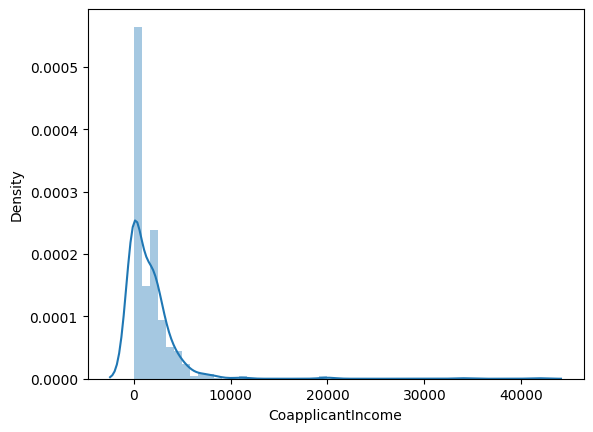

In [4]:
sns.distplot(dataset["CoapplicantIncome"])
plt.show()

In [5]:
# using iqr method we remove the outlier
#q1 = dataset['CoapplicantIncome'].quantile(0.25)
#q3 = dataset['CoapplicantIncome'].quantile(0.75)

#iqr = q3-q1

In [6]:
#min_r = q1-(1.5*iqr)
#max_r = q3+(1.5*iqr)

#min_r, max_r

(-3445.875, 5743.125)

In [7]:
# dataset = dataset[dataset['CoapplicantIncome']<=max_r]

C:\Users\salman\AppData\Local\Temp\ipykernel_7540\1899262194.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset["CoapplicantIncome"])


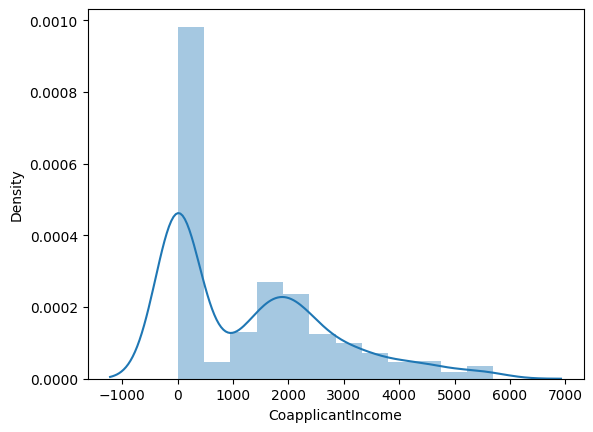

In [8]:
sns.distplot(dataset["CoapplicantIncome"])
plt.show()

### Applying Function transformation 

In [22]:
from sklearn.preprocessing import FunctionTransformer 

In [23]:
ft = FunctionTransformer(func=np.log1p)
# we cannor use log base 10 , and log e  because they dont work on zero value so we use lop1p 

In [24]:
ft.fit(dataset[["CoapplicantIncome"]])

FunctionTransformer(func=<ufunc 'log1p'>)

In [25]:
dataset['CoapplicantIncome_tf'] = ft.transform(dataset[["CoapplicantIncome"]])


C:\Users\salman\AppData\Local\Temp\ipykernel_7540\2231862542.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset["CoapplicantIncome"])
C:\Users\salman\AppData\Local\Temp\ipykernel_7540\2231862542.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset["CoapplicantIncome_tf"])


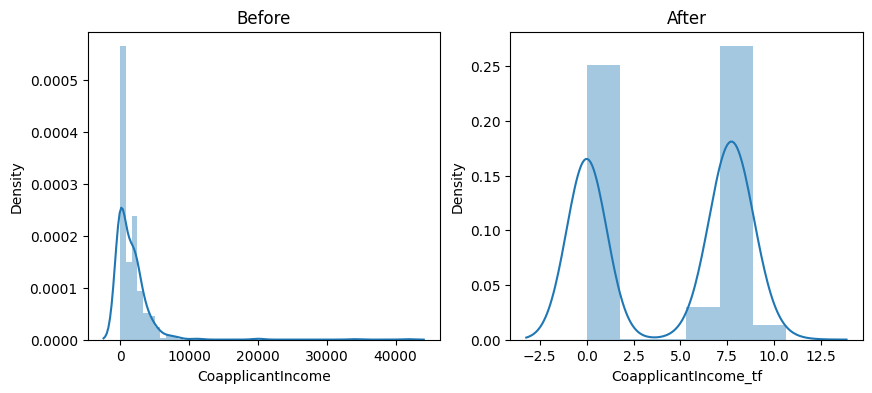

In [26]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.distplot(dataset["CoapplicantIncome"])
plt.title("Before")

plt.subplot(1,2,2)
sns.distplot(dataset["CoapplicantIncome_tf"])
plt.title("After")
plt.show()

In [ ]:
### why we use Function transformation ?
# the outlier will remove using this  before using any technique to remove outlier . after removing outlier usinh iqr or z score some data will lost
# in some situuation the imp data present in oulier so we use function transformation 